In [290]:
import numpy as np
import matplotlib.pyplot as plt
from nsepy import get_history
from sklearn.model_selection import train_test_split
from datetime import date
from datetime import datetime

In [291]:
df = get_history(symbol= 'SBIN', 
                        start = date(2015,1,2), 
                        end = date(2019,5,16))
df = df.reset_index()
#len(df)

In [298]:
prices = df['Close'].tolist()
dates = df.index.tolist()
dates = np.reshape(dates, (len(dates), 1))
prices = np.reshape(prices, (len(prices), 1))
max(prices)

array([337.5])

In [299]:
x_train, x_test, y_train, y_test = train_test_split(dates, prices, test_size=0.5)
y_train = y_train/max(prices)
y_test = y_test/max(prices)

In [294]:
from keras import models
from keras import layers
import tensorflow as tf 
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(100, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(100, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(1, activation=tf.nn.relu))

model.compile(optimizer="adam", loss="mean_squared_error")

In [295]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
540/540 [==============================] - 13s 24ms/sample - loss: 0.6255
Epoch 2/10
540/540 [==============================] - 0s 174us/sample - loss: 0.6255
Epoch 3/10
540/540 [==============================] - 0s 174us/sample - loss: 0.6255
Epoch 4/10
540/540 [==============================] - 0s 174us/sample - loss: 0.6255
Epoch 5/10
540/540 [==============================] - 0s 174us/sample - loss: 0.6255
Epoch 6/10
540/540 [==============================] - 0s 174us/sample - loss: 0.6255
Epoch 7/10
540/540 [==============================] - 0s 260us/sample - loss: 0.6255
Epoch 8/10
540/540 [==============================] - 0s 145us/sample - loss: 0.6255
Epoch 9/10
540/540 [==============================] - 0s 174us/sample - loss: 0.6255
Epoch 10/10
540/540 [==============================] - 0s 174us/sample - loss: 0.6255


In [296]:
model.evaluate(x_test, y_test)

540/540 [==============================] - 4s 7ms/sample - loss: 0.6270


0.6270096469808508

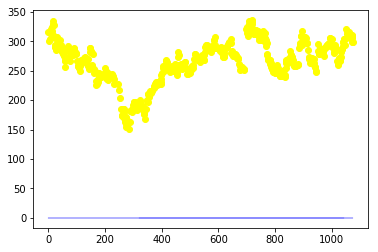

In [297]:
plt.scatter(x_test, y_test*max(prices), color='yellow', label= 'Actual Price')
plt.plot(x_test, model.predict(x_test)*max(prices), color='blue', linewidth=.3, label = 'Predicted Price')

In [301]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(100, input_shape=(1, 1), return_sequences=True))
model.add(tf.keras.layers.LSTM(100))
model.add(tf.keras.layers.Dense(1, activation=tf.nn.relu))

model.compile(optimizer="adam", loss="mean_squared_error")

In [287]:
x_train = np.reshape(x_train, (len(x_train), 1, 1))
x_test = np.reshape(x_test, (len(x_train), 1, 1))

In [288]:
model.fit(x_train, y_train, epochs=50)
model.evaluate(x_test, y_test)

Epoch 1/50
540/540 [==============================] - 11s 21ms/sample - loss: 0.1538
Epoch 2/50
540/540 [==============================] - 0s 405us/sample - loss: 0.0251
Epoch 3/50
540/540 [==============================] - 0s 376us/sample - loss: 0.0136
Epoch 4/50
540/540 [==============================] - 0s 347us/sample - loss: 0.0124
Epoch 5/50
540/540 [==============================] - 0s 376us/sample - loss: 0.0118
Epoch 6/50
540/540 [==============================] - 0s 376us/sample - loss: 0.0113
Epoch 7/50
540/540 [==============================] - 0s 376us/sample - loss: 0.0110
Epoch 8/50
540/540 [==============================] - 0s 347us/sample - loss: 0.0108
Epoch 9/50
540/540 [==============================] - 0s 376us/sample - loss: 0.0107
Epoch 10/50
540/540 [==============================] - 0s 463us/sample - loss: 0.0101
Epoch 11/50
540/540 [==============================] - 0s 405us/sample - loss: 0.0099
Epoch 12/50
540/540 [==============================] - 0s 405us

0.0034785225659746816

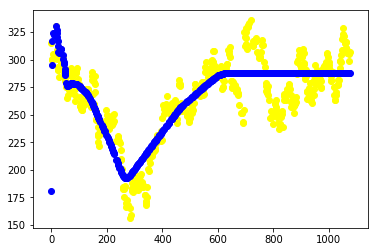

In [289]:
y = model.predict(x_test)
x_test = x_test.reshape(len(x_test), 1)
y = y.reshape(len(y), 1)
plt.scatter(x_test, y_test*max(prices), color='yellow', label= 'Actual Price')
plt.scatter(x_test, y*max(prices), color='blue', label = 'Predicted Price')

In [216]:
x_test.shape

(540, 1)

In [217]:
y_test.shape

(540, 1)